## Predictive ML Project
### 1895 through 2018 January average high temperatures in New York City
### Author: Branton Dawson
### GitHub project repository: [datafun-07-ml](https://github.com/bjdawson23/datafun-07-ml)

In [166]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Part 1 - Chart a Straight Line 

1. Store each Fahrenheit/Celsius pair as a tuple in temps.
2. Then place data in a DataFrame.
3. Set the y-axis label to Celsius.

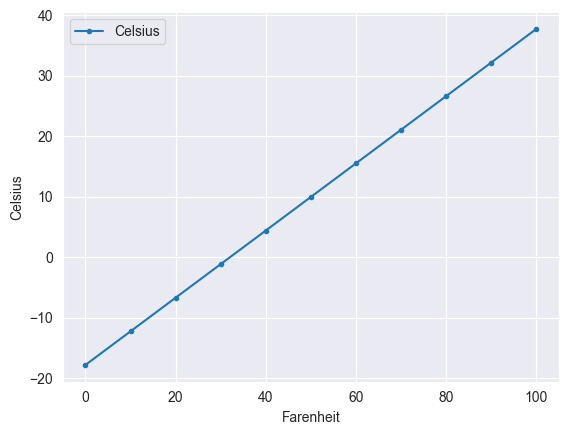

In [167]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [168]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [169]:
nyc_df.head(10)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4
7,190201,35.0,-2.4
8,190301,35.5,-1.9
9,190401,29.8,-7.6


In [170]:
nyc_df.tail(10)

,Date,Value,Anomaly
114,200901,33.4,-4.0
115,201001,38.1,0.7
116,201101,34.8,-2.6
117,201201,44.2,6.8
118,201301,40.8,3.4
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [171]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [172]:
nyc_df.head(10)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4
7,190201,35.0,-2.4
8,190301,35.5,-1.9
9,190401,29.8,-7.6


In [173]:
nyc_df.Date.dtype

dtype('int64')

In [174]:
nyc_df.Date = nyc_df.Date.floordiv(100)

In [175]:
nyc_df.head(10)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
5,1900,37.4,0.0
6,1901,37.0,-0.4
7,1902,35.0,-2.4
8,1903,35.5,-1.9
9,1904,29.8,-7.6


### Section 4 - Descriptive Statistics

In [176]:
pd.set_option('display.precision', 2)

In [177]:
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [178]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [179]:
linear_regression.slope

np.float64(0.014771361132966163)

In [180]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
1. Predict temperature in the year 2030.

In [181]:
linear_regression.slope * 2030 + linear_regression.intercept

np.float64(38.6808563335956)

2. Predict what the temperature may have been in the year 1850.

In [182]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

### Section 7 - Visualizations

(-10.0, 60.0)

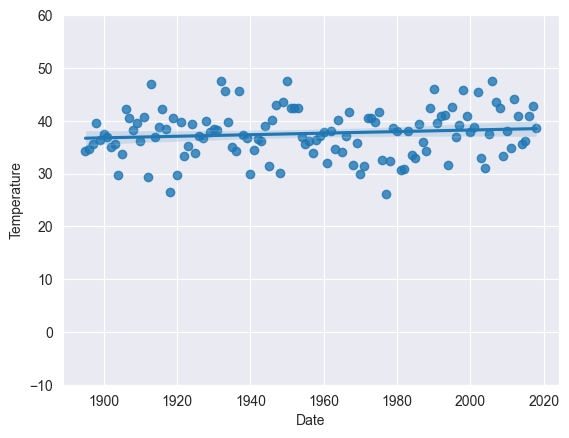

In [183]:
# Plot the average high temperatures and regression line
sns.set_style('darkgrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

# Scale y-axis 
axes.set_ylim(-10, 60)